<div align="center" style="display: flex; justify-content: space-between;">
  <div style="flex: 1; padding: 10px;">
    <a href="https://github.com/encord-team/text-to-image-eval/actions?query=workflow%3ATests" target="_blank" style="text-decoration:none"><img src="https://github.com/encord-team/text-to-image-eval/actions/workflows/tests.yml/badge.svg?branch=main"></a>
    <a href="https://www.python.org/downloads/release/python-3119/" target="_blank" style="text-decoration:none"><img src="https://img.shields.io/badge/python-3.11%2B-blue" alt="Python Versions"></a>
    <a target="_blank" style="text-decoration:none"><img alt="PRs Welcome" src="https://img.shields.io/badge/PRs-Welcome-blue"></a>
    <img alt="License" src="https://img.shields.io/github/license/encord-team/text-to-image-eval">
  </div>
  <div style="flex: 1; padding: 10px;">
    <a href="https://github.com/encord-team/encord-notebooks" target="_blank" style="text-decoration:none"><img alt="Encord Notebooks" src="https://img.shields.io/badge/Encord_Notebooks-blue?logo=github&label=&labelColor=181717"></a>
    <a href="https://join.slack.com/t/encordactive/shared_invite/zt-1hc2vqur9-Fzj1EEAHoqu91sZ0CX0A7Q" target="_blank" style="text-decoration:none"><img alt="Join us on Slack" src="https://img.shields.io/badge/Join_Our_Community-4A154B?label=&logo=slack&logoColor=white"></a>
    <a href="https://twitter.com/encord_team" target="_blank" style="text-decoration:none"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/encord_team?label=%40encord_team&amp;style=social"></a>
  </div>
</div>

<h1 align="center">
    <img src="https://storage.googleapis.com/docs-media.encord.com/static/img/text-to-image-eval/tti-eval-banner-short.png" alt="tti-eval logo banner">
</h1>

# 📝 tti-eval | 🖥️ CLI Quickstart

Welcome to the *CLI quickstart* guide for the `tti-eval` tool. This notebook covers the basic usage of the CLI commands and their options providing a quick way to test `tti-eval` without installing anything locally.

In theis notebook, you will explore:
- Building embeddings.
- Evaluating models.
- 📊 Generating 2D animations of the embeddings.

## Overview

`tti-eval` is a repository for benchmarking text-to-image models **on your own data**!

With this library, you can take an embedding model intended for jointly embedding images and text (like [CLIP](https://huggingface.co/openai/clip-vit-large-patch14-336)) and compute metrics for how well such model performs on classifying your custom dataset.

🟡 Prior to continuing, ensure that Colab's runtime type is set to `T4 GPU` instead of `CPU`. You can find this option under 'Runtime > Change runtime type > Hardware accelerator'. Additionally, note that the notebook may restart the runtime the first time you run it after installing Python 3.11. This restart is necessary as switching Python versions in Colab requires a runtime restart.

> Learn more about 📝 `tti-eval`:
> - [🐍 Python Quickstart](https://colab.research.google.com/drive/1DNn5uH6rss8I4BZG4-Y0rayRkRwYXwMu?usp=sharing)
> - [🤖 Bring Your Own Model From Hugging Face Quickstart](https://colab.research.google.com/drive/1ZuhBJ5QtH3MKuO-Y5QiiEKoz4BU1Un-8?usp=sharing)
> - [🗄️ Bring Your Own Dataset From Encord Quickstart](https://colab.research.google.com/drive/1qESU9zx1cBnK3vUDpOeuH6uZjt-f5Cb6?usp=sharing)
> - [GitHub repository](https://github.com/encord-team/text-to-image-eval)

## Set up the repo and dependencies

In [ ]:
#@title 1. Install and set up Python 3.11 {display-mode: "form"}
# Credits to JanEricNitschke in https://github.com/pnxenopoulos/awpy/issues/248#issuecomment-1575170156

#The code below installs 3.11 (assuming you now have 3.10) and restarts environment, so you can run your cells.
import sys #for version checker
import os #for restart routine

if '3.11' in sys.version:
  print('You already have 3.11, nothing to install')
elif '3.10' in sys.version:
  print("Python version is: ", sys.version)

  print("Printing content of /usr/local/lib/python* to see available versions")
  !ls /usr/local/lib/python*

  #install python 3.11 and dev utils
  #you may not need all the dev libraries, but I haven't tested which aren't necessary.
  !sudo apt-get update -y > /dev/null
  !sudo apt-get install python3.11 python3.11-dev python3.11-distutils libpython3.11-dev > /dev/null
  !sudo apt-get install python3.11-venv binfmt-support  > /dev/null #recommended in install logs of the command above

  #change alternatives
  !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1 > /dev/null
  !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 2 > /dev/null

  # install pip
  !curl -sS https://bootstrap.pypa.io/get-pip.py | python3.11  > /dev/null

  #install colab's dependencies
  !python3 -m pip install ipython==7.9.0 traitlets==5.7.1 jupyter psutil matplotlib setuptools ipython_genutils ipykernel jupyter_console notebook prompt_toolkit httplib2 astor  > /dev/null

  #minor cleanup
  !sudo apt autoremove > /dev/null

  #link to the old google package
  !ln -s /usr/local/lib/python3.10/dist-packages/google /usr/local/lib/python3.11/dist-packages/google > /dev/null

  #this is just to verify if 3.11 folder was indeed created
  print("Printing content of /usr/local/lib/python3.11/")
  !ls /usr/local/lib/python3.11/

  #restart environment so you don't have to do it manually
  os.kill(os.getpid(), 9)
else:
  print("Your out of the box Python is not 3.10, so probably the script will not work, so pls feel free to edit the script to ignore then check and re-run: ", sys.version)

You already have 3.11, nothing to install


In [ ]:
#@title 2. Clone the repo
!git clone https://github.com/encord-team/text-to-image-eval.git

Cloning into 'text-to-image-eval'...
remote: Enumerating objects: 852, done.
remote: Counting objects: 100% (434/434), done.
remote: Compressing objects: 100% (239/239), done.
remote: Total 852 (delta 300), reused 261 (delta 194), pack-reused 418
Receiving objects: 100% (852/852), 2.01 MiB | 20.21 MiB/s, done.
Resolving deltas: 100% (455/455), done.


In [ ]:
#@title 3. Install repo dependencies
%cd /content/text-to-image-eval/
!pip install poetry
!poetry config virtualenvs.in-project true # Configure Poetry to create virtual environments in the project folder
!poetry add ipykernel # Resolve Colab specific missing dependency
!poetry install --no-ansi

sys.path.insert(0, '/content/text-to-image-eval/.venv/lib/python3.11/site-packages')

## CLI Usage

### 1. Embeddings Generation

To build embeddings, run the CLI command `tti-eval build`. This command allows you to interactively select the model and dataset combinations on which to build the embeddings.

Alternatively, you can choose known (model, dataset) pairs using the `--model-dataset` option. For example, the following command builds the embeddings of the *clip* and *bioclip* models on the *Alzheimer-MRI* dataset:

In [ ]:
!poetry run tti-eval build --model-dataset clip/Alzheimer-MRI --model-dataset bioclip/Alzheimer-MRI

config.json: 100% 4.76k/4.76k [00:00<00:00, 26.9MB/s]
pytorch_model.bin: 100% 1.71G/1.71G [00:13<00:00, 124MB/s]
preprocessor_config.json: 100% 316/316 [00:00<00:00, 1.93MB/s]
tokenizer_config.json: 100% 844/844 [00:00<00:00, 5.65MB/s]
vocab.json: 100% 862k/862k [00:00<00:00, 34.0MB/s]
merges.txt: 100% 525k/525k [00:00<00:00, 2.69MB/s]
tokenizer.json: 100% 2.22M/2.22M [00:00<00:00, 7.22MB/s]
special_tokens_map.json: 100% 389/389 [00:00<00:00, 2.93MB/s]
Generating train split: 100% 5120/5120 [00:00<00:00, 72306.09 examples/s]
Generating test split: 100% 1280/1280 [00:00<00:00, 74556.08 examples/s]
Embedding (train) Alzheimer-MRI dataset with clip: 100% 88/88 [09:34<00:00,  6.52s/it]
Embeddings saved successfully to file at `/content/text-to-image-eval/.cache/embeddings/Alzheimer-MRI/clip_train.npz`
Embedding (validation) Alzheimer-MRI dataset with clip: 100% 16/16 [01:41<00:00,  6.37s/it]
Embeddings saved successfully to file at `/content/text-to-image-eval/.cache/embeddings/Alzheimer-M

### 2. Model Evaluation

To evaluate models, use the CLI command `tti-eval evaluate`. This command enables interactive selection of model and dataset combinations for evaluation.

Alternatively, you can specify known (model, dataset) pairs using the `--model-dataset` option. For example, the following command evaluates the embeddings of the *clip* and *bioclip* models on the *Alzheimer-MRI* dataset:

In [ ]:
!poetry run tti-eval evaluate --model-dataset clip/Alzheimer-MRI --model-dataset bioclip/Alzheimer-MRI

===== zero_shot =====
-------------  -------------
Model/Dataset  Alzheimer-MRI
bioclip        0.3086
clip           0.4870
-------------  -------------
===== linear_probe =====
-------------  -------------
Model/Dataset  Alzheimer-MRI
bioclip        0.6094
clip           0.5391
-------------  -------------
===== wKNN =====
-------------  -------------
Model/Dataset  Alzheimer-MRI
bioclip        0.9232
clip           0.7357
-------------  -------------
===== I2IR =====
-------------  -------------
Model/Dataset  Alzheimer-MRI
bioclip        0.4349
clip           0.4108
-------------  -------------


### 3. Embeddings Animation


To create 2D animations of the embeddings, use the CLI command `tti-eval animate`. This command allows to visualise the reduction of embeddings from two models on the same dataset.


You have the option to interactively select two models and a dataset for visualization. Alternatively, you can specify the models and dataset as arguments. For example:

```
tti-eval animate clip bioclip Alzheimer-MRI
```

The animations will be saved at the location specified by the environment variable `TTI_EVAL_OUTPUT_PATH`.
By default, this path corresponds to the `output/animations` folder in the repository directory.
To interactively explore the animation in a temporary session, use the `--interactive` flag.

🟡 Colab doesn't handle interactive output well, so the following example will generate the animation and display it separate steps instead of using the `--interactive` flag to show it in one go.

In [ ]:
#@markdown Run this cell to generate the embeddings animation
!poetry run tti-eval animate clip bioclip Alzheimer-MRI

Animation stored at `/content/text-to-image-eval/output/animations/transition_Alzheimer-MRI_clip_bioclip_validation_20240510-090358.gif`


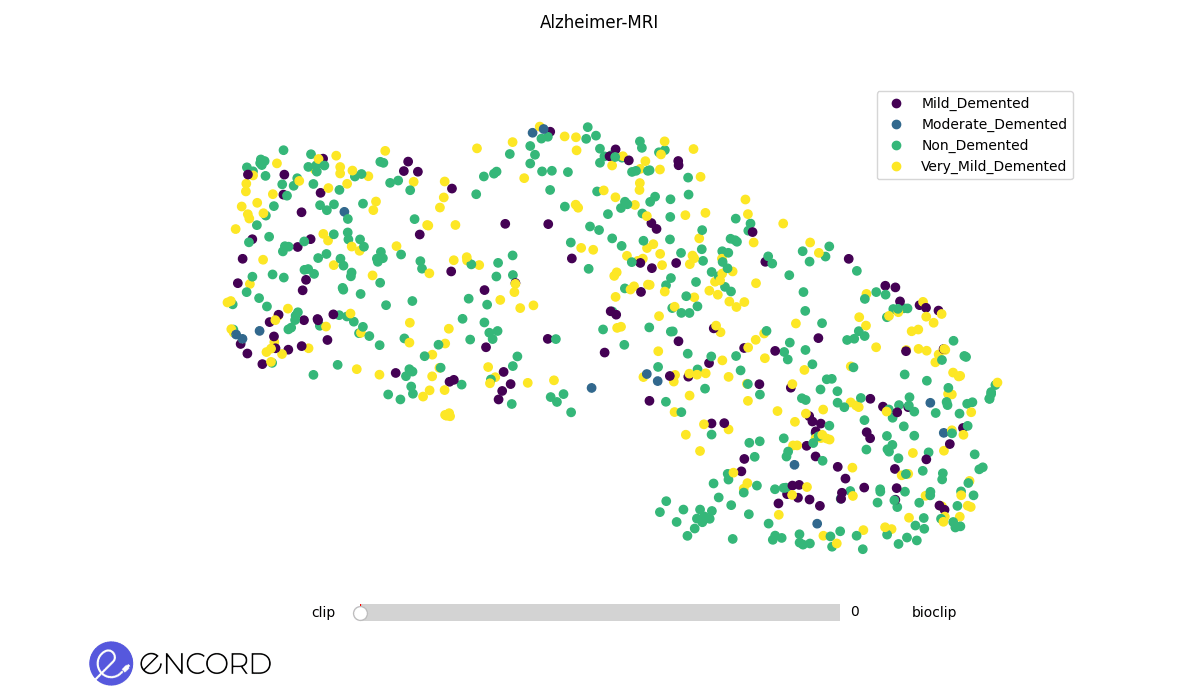

In [ ]:
#@markdown Display the animation
from pathlib import Path
from IPython.display import Image

# Automatic search of the file
# You can get the path of the animation from the previous cell's output
animation_file = next(Path('output/animations').glob("transition_Alzheimer-MRI_clip_bioclip_*.gif")).as_posix()
#animation_file = '/content/text-to-image-eval/output/animations/transition_Alzheimer-MRI_clip_bioclip_validation_20240508-122954.gif'
Image(open(animation_file,'rb').read())

### [Extra] Play with the interactive versions of tti-eval commands in Colab

In [ ]:
# Install and run an interactive shell
!pip install colab-xterm
%load_ext colabxterm
%xterm

#@markdown Shell History Example:\
#@markdown poetry shell\
#@markdown tti-eval build # choose 'clip' and 'bioclip' models in the 'Alzheimer-MRI' dataset\
#@markdown tti-eval evaluate # evaluate model performance in the 'Alzheimer-MRI' dataset\
#@markdown tti-eval animate # generate cool embedding animations

## Wrap Up

This notebook has provided an introduction to the CLI commands of `tti-eval`, showcasing how to utilize them for tasks like building embeddings, evaluating models and generating 2D animations of the embeddings.

---

🟣 `tti-eval` is an open-source repository for benchmarking text-to-image models **on your own data**!
**Check out the project on [GitHub](https://github.com/encord-team/text-to-image-eval) and leave a star 🌟** if you like it.
Contributions are welcome!
Please feel free to open an issue or submit a pull request with your suggestions, bug fixes, or new features.

---

👉 Check out the 📖 [Encord Blog](https://encord.com/blog/) and 📺 [YouTube](https://www.youtube.com/@encord) channel to stay up-to-date with the latest in computer vision, foundation models, active learning, and data-centric AI.


## Next: Learn the basics of the Python programmatic approach for `tti-eval`

What's next? 👀 Dive into the Python programmatic approach for `tti-eval`. In the Colab notebook, you will explore:
- Understanding embedding definitions and how to instantiate them.
- Building embeddings.
- Evaluating models.
- 📊 Generating 2D animations of the embeddings.

[NEXT NOTEBOOK](https://colab.research.google.com/drive/1DNn5uH6rss8I4BZG4-Y0rayRkRwYXwMu?usp=sharing) ➡️